<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
class k_nearest_neighbors():
  def __init__(self, k=3, class_num=2):
    self.k = k
    self.class_num = class_num
  def get_template(self, data, label):
    self.template = [[data[i],label[i]] for i in range(label.size)]
  def recognize(self, data):
    self.vote_list = [0 for i in range(self.class_num)]
    self.distance_of_all = [[sum(np.square(self.template[i][0] - data)),i] for i in range(len(self.template))]
    self.class_iterator = 0
    self.sorted_distance = sorted(self.distance_of_all, key=lambda x:x[0])

    for i in range(self.k):
      self.vote_list[self.template[self.sorted_distance[i][1]][1]] += 1
    if self.vote_list[0] == self.vote_list[1]:
      return -1
    else:
      return self.vote_list.index(max(self.vote_list))

In [0]:
data_path = '/content/drive/My Drive/Dataset/diabetes.csv'
pima = pd.read_csv(data_path)
pima_tr = pima.sample(n = 200, replace = False)
pima_te = pima.sample(n = 300)

pima_data = pima.drop(columns=['Outcome'])
pima_tr_label = np.array(pima_tr['Outcome'].tolist())
pima_tr_nolabel = pima_tr.drop(columns = ['Outcome'])
pima_tr_data = ((pima_tr_nolabel-pima_data.mean())/pima_data.std()).values
pima_te_label = np.array(pima_te['Outcome'].tolist())
pima_te_nolabel = pima_te.drop(columns = ['Outcome'])
pima_te_data = ((pima_te_nolabel-pima_data.mean())/pima_data.std()).values

In [114]:
error_list = []
reject_list = []
for j in range(60):
  knn = k_nearest_neighbors(k=j+1)
  knn.get_template(pima_tr_data, pima_tr_label)
  error = 0
  reject = 0
  for i in range(len(pima_te_label)):
    result = knn.recognize(pima_te_data[i])
    if result == -1:
      reject += 1
    elif result != pima_te_label[i]:
      error += 1
  print("error: {:.2%}\treject: {:.2%}".format(error/len(pima_te_label),reject/len(pima_te_label)))
  error_list.append(error/len(pima_te_label))
  reject_list.append(reject/len(pima_te_label))

error: 20.00%	reject: 0.00%
error: 8.33%	reject: 33.00%
error: 23.00%	reject: 0.00%
error: 16.00%	reject: 15.67%
error: 23.33%	reject: 0.00%
error: 16.33%	reject: 16.67%
error: 24.00%	reject: 0.00%
error: 18.33%	reject: 16.00%
error: 27.00%	reject: 0.00%
error: 20.33%	reject: 11.33%
error: 27.67%	reject: 0.00%
error: 23.33%	reject: 7.67%
error: 27.67%	reject: 0.00%
error: 24.00%	reject: 8.33%
error: 29.00%	reject: 0.00%
error: 24.33%	reject: 8.33%
error: 28.00%	reject: 0.00%
error: 25.67%	reject: 6.00%
error: 28.00%	reject: 0.00%
error: 23.67%	reject: 7.67%
error: 27.67%	reject: 0.00%
error: 25.33%	reject: 5.33%
error: 28.67%	reject: 0.00%
error: 27.33%	reject: 4.00%
error: 29.33%	reject: 0.00%
error: 26.67%	reject: 5.33%
error: 28.33%	reject: 0.00%
error: 26.67%	reject: 5.33%
error: 29.00%	reject: 0.00%
error: 27.67%	reject: 4.00%
error: 30.33%	reject: 0.00%
error: 29.00%	reject: 3.33%
error: 32.00%	reject: 0.00%
error: 29.67%	reject: 4.00%
error: 31.00%	reject: 0.00%
error: 30.67%	re

In [0]:
error_rate_odd = error_list[0: 59: 2]
error_rate_even = error_list[1: 60: 2]
k_odd = np.arange(0, 59, 2)
k_even = np.arange(1, 60, 2)
reject_rate_even = reject_list[1: 60: 2]

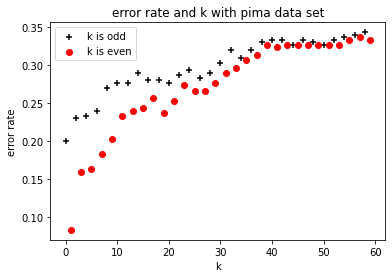

In [128]:
plt.figure("error rate and k with pima data set")
plt.title("error rate and k with pima data set")
plt.scatter(k_odd, error_rate_odd, marker='+', color='black', label='k is odd')
plt.scatter(k_even, error_rate_even, marker='o', color='red', label='k is even')
plt.xlabel('k')
plt.xticks([0,10,20,30,40,50,60])
plt.ylabel('error rate')
plt.legend()

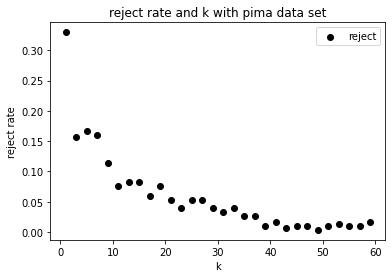

In [139]:
plt.figure("reject rate and k with pima data set")
plt.title("reject rate and k with pima data set")
plt.scatter(k_even, reject_rate_even, marker='o', color='black', label='reject')
plt.xlabel('k')
plt.xticks([0,10,20,30,40,50,60])
plt.ylabel('reject rate')
plt.legend()